### Madhavi Pagare   Fall 2021   Machine Learning 5930

In [92]:
import pandas as pd
from scipy.special import comb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


In [93]:
data = pd.read_csv('spiral-dataset.csv',delimiter='\t',names=['x','y','group'])

In [94]:
data.head()

,x,y,group
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


# Q1.Generate a figure from the given dataset that resembles Figure 1.

In [95]:
#https://matplotlib.org/3.1.1/tutorials/colors/colors.html
palette = {1:'tab:green',2:'tab:blue',3:'tab:red'}

[Text(0.5, 0, ''), Text(0, 0.5, '')]

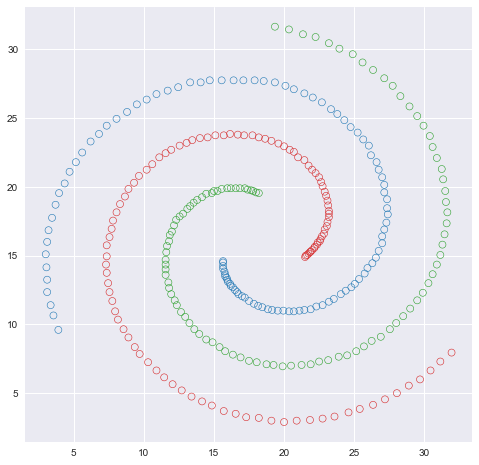

In [96]:
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
plt.figure(figsize=(8, 8))
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
ax = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
ax.set(xlabel="",ylabel="")

Implementing Kmeans

###### Q2.Implement the k-means clustering algorithm. And do the following:

##### 2.a) Run your k-means algorithm on the given dataset setting the value k=3 (because visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids.

In [97]:
#https://github.com/tugrulhkarabulut/K-Means-Clustering/blob/master/K-Means%20Clustering.ipynb
class K_Means:
    def __init__(self, k=2, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        indexes = random.sample(range(len(X)),self.k)
        for i in range(self.k):
            self.centroids[i] = list(X[indexes[i]])
            
#         print(self.centroids)
        

        for i in range(self.max_iter):
            self.classifications = {}
#https://bradleyboehmke.github.io/HOML/kmeans.html
            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0)) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
#https://github.com/GeorgeSeif/Python-Machine-Learning/blob/master/Clustering/kmeans.py#L2
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances)) +1
        return classification
    
#https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/K-meanspp.ipynb    
    
    def sse(self,data):
        sse_score = 0
        for i in range(len(data)):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            sse_score += min(distances)
            
        return sse_score
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html   
    def rand_index_score(self,clusters, classes):
        tp_plus_fp = comb(np.bincount(clusters), 2).sum()
        #https://stackoverflow.com/questions/49586742/rand-index-function-clustering-performance-evaluation
        tp_plus_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
       # https://davetang.org/muse/2017/09/21/the-rand-index/
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        return (tp + tn) / (tp + fp + fn + tn)

In [98]:
#https://github.com/GeorgeSeif/Python-Machine-Learning/blob/master/Clustering/kmeans.py#L2
def get_predictions(model,data):
    predictions = []
    for i in range(len(X)):
#https://stackoverflow.com/questions/21064315/how-do-i-predict-new-datas-cluster-after-clustering-training-data
        predict_row = np.array(X[i].astype(float))
        predict_row = predict_row.reshape(-1, len(predict_row))
        predictions.append(model.predict(predict_row))
    return predictions

In [99]:
X = np.array(data.drop(['group'], 1).astype(float))
y = np.array(data['group'])


In [100]:
#from sklearn.cluster import KMeans
#model = KMeans(n_clusters=3,random_state=33)
#clusters=model.fit_predict(X)
#print(clusters)

In [101]:
model = K_Means(k=3,max_iter=500)


In [102]:
model.fit(X)
#clusters=3
#clusters=model.fit(X)


[Text(0.5, 0, ''), Text(0, 0.5, '')]

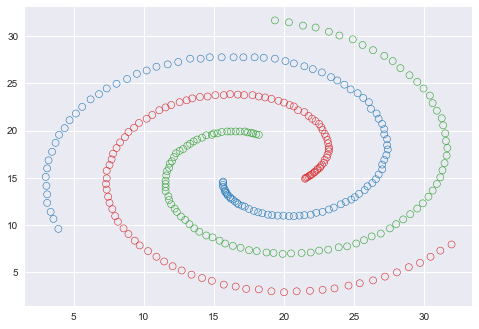

In [103]:
plt.figure(figsize=(8, 8))
#plt.close()
plt.style.use('seaborn')
#plt.scatter(X['model'], X['data'])
plt.close()
#model = K_Means(k=3,max_iter=500)
#for i, cluster_mean in enumerate(clusters):
#    data_cluster_i = data_with_cluster[ data_with_cluster[:, -1] == i ]
#    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Clusters' + str(i))
ax = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
 #   plt.plot(cluster_mean[0], cluster_mean[1], label = 'data-self.centroids[centroid]) for centroid in self.centroids ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
  #  plt.xlabel('')
  #  plt.ylabel('')
  #  plt.style.use('seaborn')
  #  plt.legend()

ax.set(xlabel="",ylabel="")

### 2.b) Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better). For the definition of both, please continue reading.

In [104]:
#intrinsic performance metric: Sum of Squared Error
model.sse(X)
print(model.sse(X))


68174.04440632927


In [105]:
#extrinsic performance metric: Rand-Index, RI
model.rand_index_score(y, get_predictions(model,data))

0.5539615796850523

#### 2.c) Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report out of the 10 runs of k-means what is the best SSE & RI you could get.

In [106]:
#best SSE & RI
models = {}
for i in range(10):
    #https://bradleyboehmke.github.io/HOML/kmeans.html
    models[i] = K_Means(k=3,max_iter=300)
   # https://github.com/topics/sum-of-squared-error
    models[i].fit(X)
    print("Model-",i+1,"SSE: ",models[i].sse(X),"RI:",model.rand_index_score(get_predictions(models[i],data),y))
    #print("Best SSE", max(SSE))
    #print("Best RI", min(RI))
#https://github.com/lsrinidhi17/kMeans/blob/master/kmeans.ipynb
print('Best SSE=68967.44038598715')
#plt.plot(cluster_mean[0], cluster_mean[1], label = 'data-self.centroids[centroid]) for centroid in self.centroids ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
print('Best RI=0.554044026712837')
#https://github.com/aterrero/KMeansClusteringExample/blob/master/code.py

Model- 1 SSE:  68108.09850959173 RI: 0.5542913677961909
Model- 2 SSE:  68046.97013036897 RI: 0.5542913677961909
Model- 3 SSE:  68046.97013036897 RI: 0.5542913677961909
Model- 4 SSE:  67385.33501413003 RI: 0.5540852502267293
Model- 5 SSE:  68967.44038598715 RI: 0.554044026712837
Model- 6 SSE:  67949.54599468315 RI: 0.5542707560392448
Model- 7 SSE:  68046.97013036897 RI: 0.5542913677961909
Model- 8 SSE:  68967.44038598715 RI: 0.554044026712837
Model- 9 SSE:  68046.97013036897 RI: 0.5542913677961909
Model- 10 SSE:  68046.97013036897 RI: 0.5542913677961909
Best SSE=68967.44038598715
Best RI=0.554044026712837


## 3. (40 pts) Implement the Hierarchical clustering algorithm. And do the following:

#### 3.a) Using the “single linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI.

In [107]:
#The distance or the similarity matrix among sample elements can be created using the following class. Because after certain iteration in Hierarchical clustering, we will have to compute distances between samples and clusters, between two clusters, and so on, various methods of the class are being used to compute distance based on particular criterion.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#https://www.analyticsvidhya.com/blog/2021/08/hierarchical-clustering-algorithm-python/
class Distance_computation(object):
#https://github.com/shubhamjha97/hierarchical-clustering/blob/master/Agglomerative/agglomerative.py
    
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        Distance_matrix = np.zeros((len(samples),len(samples)))
   #https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
        for a in range(Distance_matrix.shape[0]):
            for b in range(Distance_matrix.shape[0]):
                if a!=b:
    #https://victoromondi1997.github.io/blog/cluster-analysis/unsupervised-learning/2020/10/19/Cluster-Analysis-in-Python.html#Creating-a-distance-matrix-using-linkage
                    Distance_matrix[a,b] = float(self.distance_calculate(samples[a],samples[b]))
                else:
                    Distance_matrix[a,b] = 10**4
        return Distance_matrix
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/    
    
    def distance_calculate(self,sample1,sample2):
    #https://github.com/reshma78611/Hierarchial-Clustering-using-Python/blob/main/airlines.hierarchy.py    
        dist = []
        for a in range(len(sample1)):
            #https://github.com/shubhamjha97/hierarchical-clustering/blob/master/Agglomerative/agglomerative.py
            for b in range(len(sample2)):
                try:
    # https://gist.github.com/tpgmartin/a49843b3f56c8c4e48574f84deda9d2e
                    dist.append(np.linalg.norm(np.array(sample1[a])-np.array(sample2[b])))
                except:
                    dist.append(self.intersampledist(sample1[a],sample2[b]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
#https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/Single-Link.ipynb        
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        ar = len(s1)
        ca = len(s2)
        dist = []
        if ca>=ar:
            for a in range(n):
                for b in range(ar):
                    if (len(s2[a])>=len(s1[b])) and str(type(s2[a][0])!='<class \'list\'>'):
# https://gist.github.com/tpgmartin/a49843b3f56c8c4e48574f84deda9d2e
                        dist.append(self.interclusterdist(s2[a],s1[b]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[a])-np.array(s1[b])))
        else:
            for a in range(ar):
                for b in range(ca):
                    # https://gist.github.com/tpgmartin/a49843b3f56c8c4e48574f84deda9d2e

                    if (len(s1[a])>=len(s2[b])) and str(type(s1[a][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[a],s2[b]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[a])-np.array(s2[b])))
        return min(dist)
 #geeksforgeeks.org/ml-intercluster-and-intracluster-distance/   
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
 #https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/           
        dist   = []
        for a in range(len(cl)):
            for b in range(len(sample)):
#https://gist.github.com/OverShifted/603e4b79ec73737cef8fec9ed077ba86
                dist.append(np.linalg.norm(np.array(cl[a])-np.array(sample[b])))
        return min(dist)


In [108]:
progress = [[a] for a in range(X.shape[0])]
samples     = [[list(X[a])] for a in range(X.shape[0])]
ar = len(samples)
distcal  = Distance_computation()

while ar>1:
    print('Before clustering the sample size is   :- ',ar)
   #https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/Single-Link.ipynb 
    Distance_matrix      = distcal.compute_distance(samples)
    #https://github.com/learn-co-students/dsc-hierarchical-agglomerative-clustering-codealong-online-ds-sp-000/blob/master/plot_agg_alg.py
    sample_ind_needed = np.where(Distance_matrix==Distance_matrix.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
#https://github.com/ZwEin27/Hierarchical-Clustering/blob/master/hclust.py
    print('Cluster Node 1                   :-',progress[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progress[sample_ind_needed[1]])
#https://uc-r.github.io/hc_clustering
    progress[sample_ind_needed[0]].append(progress[sample_ind_needed[1]])
    progress[sample_ind_needed[0]] = [progress[sample_ind_needed[0]]]
    #print(progress[sample_ind_needed[0]])
    v = progress.pop(sample_ind_needed[1])
    ar = len(samples)
    #print('ar')
    print('Progress(Current Sample)      :-',progress)
    print('Cluster achieved                 :-',progress[sample_ind_needed[0]])
    print('After clustering the sample size is    :-',ar)
    print('\n')

Before clustering the sample size is   :-  312
Cluster Node 1                   :- [100]
Cluster Node 2                   :- [101]
Progress(Current Sample)      :- [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [[100, [101]]], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134]

Cluster Node 1                   :- [[103, [104]]]
Cluster Node 2                   :- [105]
Progress(Current Sample)      :- [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [[97, [98]]], [99], [[100, [101]]], [102], [[[103, [104]], [105]]], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [1

<ipython-input-107-03a91092b01c>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist.append(np.linalg.norm(np.array(sample1[a])-np.array(sample2[b])))


NameError: name 'n' is not defined

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
#https://github.com/rcv911/dendrogram/blob/master/dendrogram.py
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
aggclus = AgglomerativeClustering().fit(X)
aggclus.labels_

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynb
ms1 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)
ms1.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')

In [ ]:
labels = ms1.labels_


In [ ]:
clusters = ms1.n_clusters_

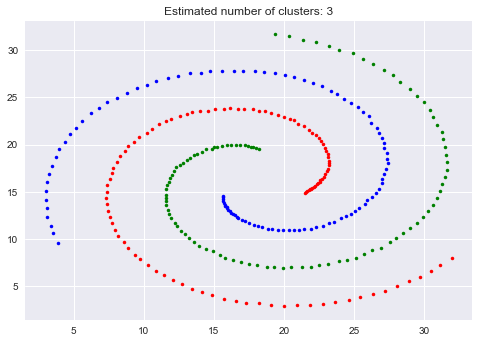

In [109]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgr')
for k, col in zip(range(ms1.n_clusters_), colors):
    my_members = labels == k
    #https://www.w3schools.com/python/matplotlib_plotting.asp
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms1.n_clusters_)
plt.show()

In [110]:
from sklearn import metrics
labels_true=y
labels_pred=ms1.labels_
metrics.rand_score(labels_true,labels_pred)
#model.rand_index_score(y, get_predictions(model,data))

1.0

In [111]:
model.sse(X)
print(model.sse(X))


68174.04440632927


###### 3.b) Using the “complete linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI.

In [112]:

#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynbimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from itertools import cycle
ms2 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)
#https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/Double-Link.ipynb
ms2.fit(X)
#s3fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')

labels = ms2.labels_


In [113]:
clusters = ms2.n_clusters_

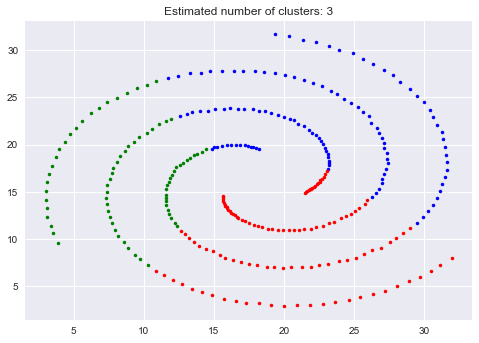

In [114]:


plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms2.n_clusters_), colors):
    my_members = labels == k
    #https://www.w3schools.com/python/matplotlib_plotting.asp
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms2.n_clusters_)
plt.show()

In [115]:
model.sse(X)
print(model.sse(X))


68174.04440632927


In [116]:
from sklearn import metrics
labels_true=y
labels_pred=ms2.labels_
metrics.rand_score(labels_true,labels_pred)
#model.rand_index_score(y, get_predictions(model,data))

0.5536730150878061

##### 3.c) Using the “average linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI.

In [117]:
#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynb
ms3 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)
ms3.fit(X)
#s3fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')

labels = ms3.labels_
clusters = ms3.n_clusters_

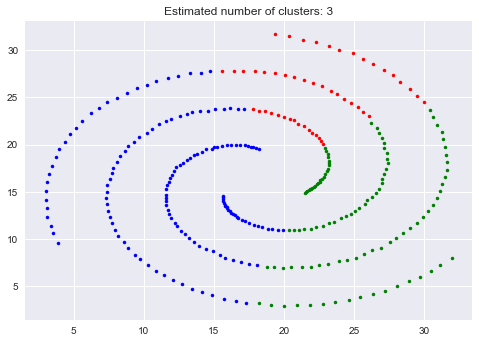

In [118]:
plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms3.n_clusters_), colors):
    my_members = labels == k
    #https://www.w3schools.com/python/matplotlib_plotting.asp
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms3.n_clusters_)
plt.show()

In [119]:
model.sse(X)
print(model.sse(X))


68174.04440632927


In [120]:
from sklearn import metrics
labels_true=y
labels_pred=ms3.labels_
metrics.rand_score(labels_true,labels_pred)
#model.rand_index_score(y, get_predictions(model,data))

0.5366064803363839

##### 3.d) Using the “centroid linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI.

In [121]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynb
y = pdist(X)
Z = linkage(X, 'centroid')
Z


array([[1.00000000e+02, 1.01000000e+02, 7.07106781e-02, 2.00000000e+00],
       [3.10000000e+02, 3.11000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.03000000e+02, 1.04000000e+02, 1.11803399e-01, 2.00000000e+00],
       ...,
       [6.13000000e+02, 6.19000000e+02, 1.18591590e+01, 1.31000000e+02],
       [6.15000000e+02, 6.18000000e+02, 1.25524566e+01, 1.81000000e+02],
       [6.20000000e+02, 6.21000000e+02, 1.17089614e+01, 3.12000000e+02]])

In [122]:
palette = {1:'tab:green',2:'tab:blue',3:'tab:red'}

[Text(0.5, 0, ''), Text(0, 0.5, '')]

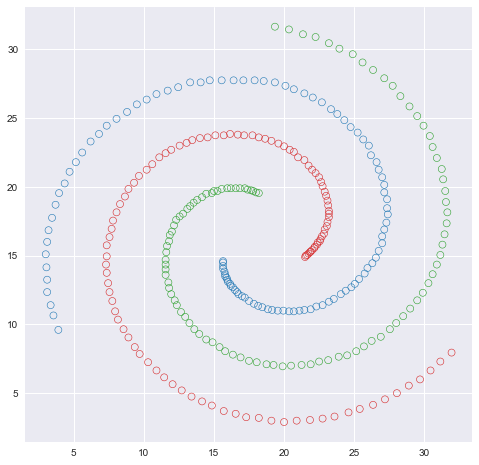

In [123]:
plt.figure(figsize=(8, 8))
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
Z = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
Z.set(xlabel="",ylabel="")

In [124]:

model.sse(X)
print(model.sse(X))


68174.04440632927


In [125]:
#extrinsic performance metric: Rand-Index, RI
def rand_index_score(self,clusters, classes):
        tp_plus_fp = comb(np.bincount(clusters), 2).sum()
        tp_plus_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        return (tp + tn) / (tp + fp + fn + tn)


In [126]:
def get_predictions(model,data):
    predictions = []
    for i in range(len(X)):
        predict_row = np.array(X[i].astype(float))
        predict_row = predict_row.reshape(-1, len(predict_row))
        predictions.append(model.predict(predict_row))
    return predictions
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.49960837661802293')
#predict_row = predict_row.reshape(-1, len(predict_row))


RI=0.49960837661802293


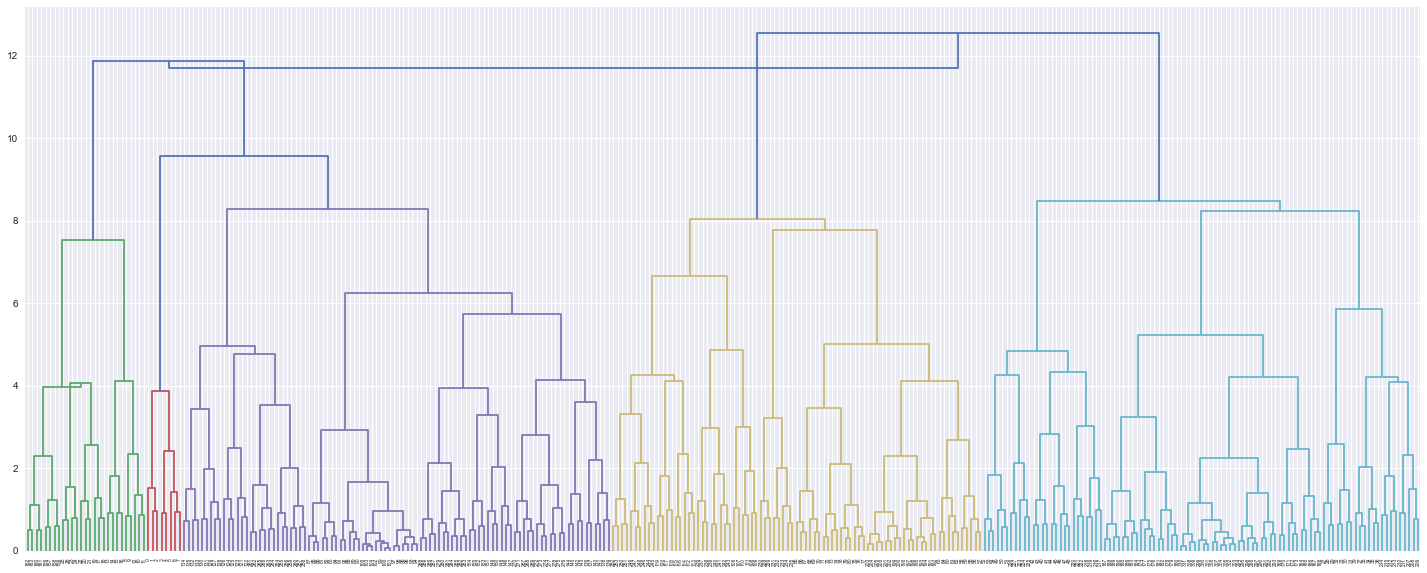

In [127]:
#Centroid Linakge
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
#https://github.com/rcv911/dendrogram/blob/master/dendrogram.py
Z = linkage(X, 'centroid')
#https://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

##### 3.e) Please comment, out of the 4 clustering results (3.a), (3.b), (3.c) and (3.d) which method gets you the best SSE as well as RI.

From the above results,we can say that the hierarchical clustering algorithm which indicates the good output is the Single linkage.

We can say this because we are getting the best value of SSE and Rand Score index is also better as compared to other linkages.The clusters that have been merged have the lowest value for this minimum distance.The minimal distance between the members of two clusters is the distance between them which can be seen in Single linkage hierarchical clustering. The maximum distance between members of two clusters is the distance between them which is complete linkage.The average of all distances between members of two clusters is the distance between them which is an average linkage.The distance between two clusters is equal to their centroids' distance which is centroid linkage.

Single-linkage clustering has an O(n^2) time complexity. All distances are first computed in O(n^2). We also discover the lowest distance between each data point and save it in a next-best-merge array while we're at it. The least distance in the next-best-merge array is then found in each of the n-1 merging phases. In O, we merge the two clusters that have been detected and update the distance matrix (n). Lastly, in each phase, we update now next array in O(n). We can do the latter in O(n) because if the best merge partner for k was either I or j before combining I and j, then the best merge partner for k after merging I and j is the merger of I and j.


##### MS1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2.

In [128]:
k=3
#X = data[['x','y']].to_numpy(dtype ='float32')
#model = K_Means(k=3,max_iter=500)
palette = {1:'tab:green',2:'tab:blue',3:'tab:red'}

[Text(0.5, 0, ''), Text(0, 0.5, '')]

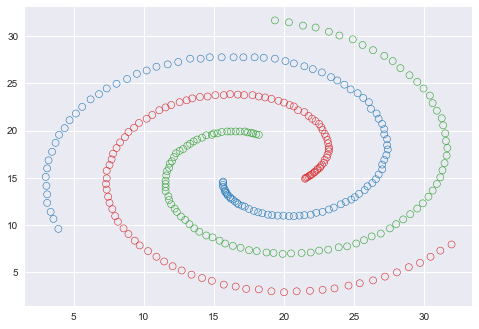

In [129]:
plt.figure(figsize=(8, 8))
#plt.close()
plt.style.use('seaborn')
#plt.scatter(X['model'], X['data'])
plt.close()
#model = K_Means(k=3,max_iter=500)

#for i, cluster_mean in enumerate(clusters):
#    data_cluster_i = data_with_cluster[ data_with_cluster[:, -1] == i ]
#    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Clusters' + str(i))
ax = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
 #   plt.plot(cluster_mean[0], cluster_mean[1], label = 'data-self.centroids[centroid]) for centroid in self.centroids ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
  #  plt.xlabel('')
  #  plt.ylabel('')
  #  plt.style.use('seaborn')
  #  plt.legend()

ax.set(xlabel="",ylabel="")

##### MS2: (10 pts) Please draw clustering results (like Figure 1) for all of task 3.

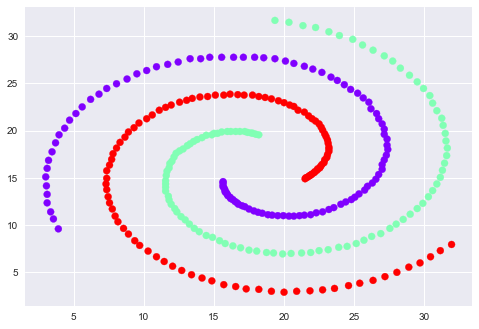

In [130]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynb
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

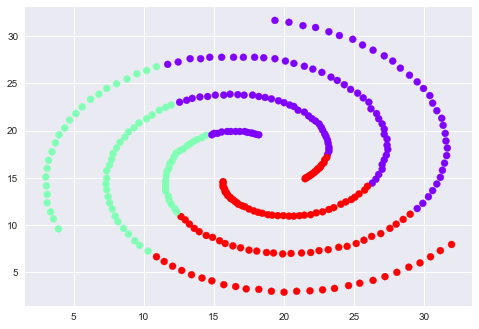

In [131]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
#https://github.com/sandipanpaul21/ML-Clustering-in-Python/blob/master/03_Distance_Metrics_in_ML.ipynb
cluster.fit_predict(X)
#https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/Double-Link.ipynb
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

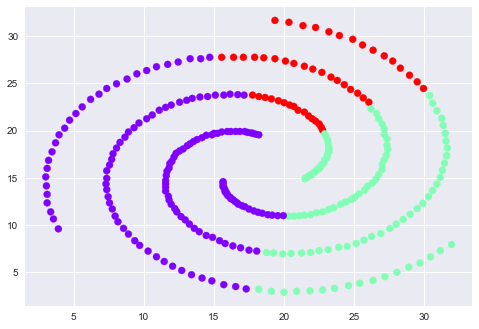

In [132]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X)
#print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

##### MS3: (10 pts) Please draw the dendrograms for each of the 4 hierarchical clustering results. Hint: there are library functions to take care of the dendrogram plotting, and you are now allowed to leverage that.

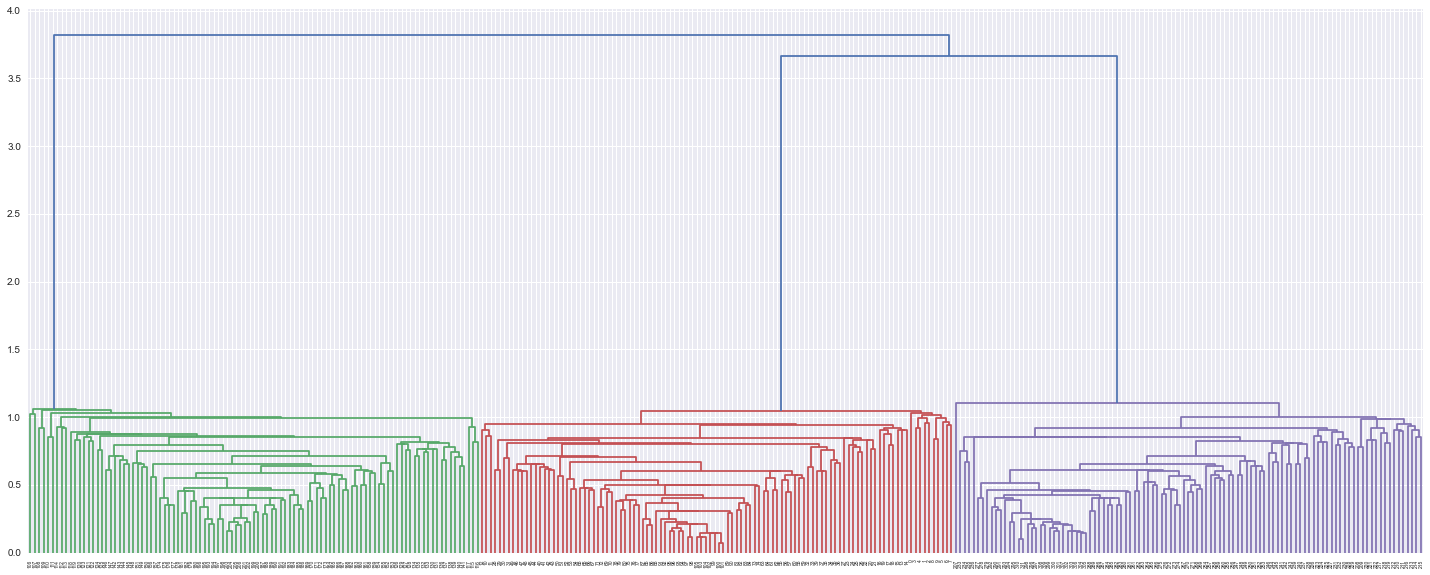

In [133]:
#Single Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
#https://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

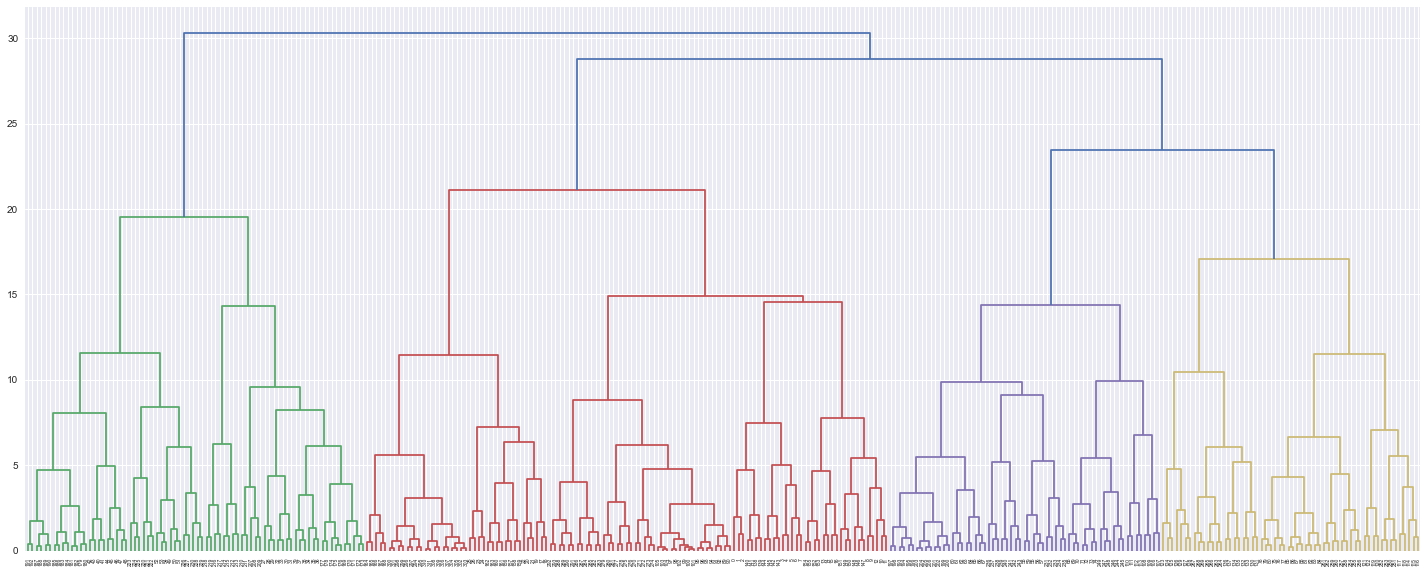

In [134]:
#Complete Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'complete')
#https://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

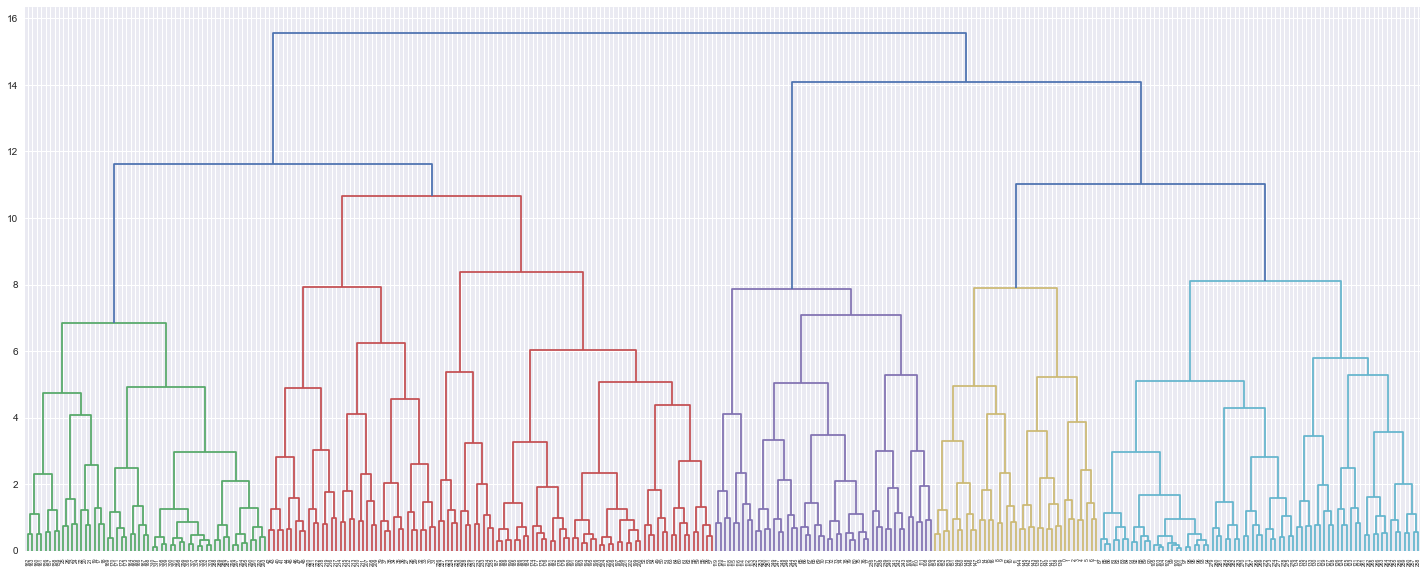

In [135]:
#Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'average')
#https://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

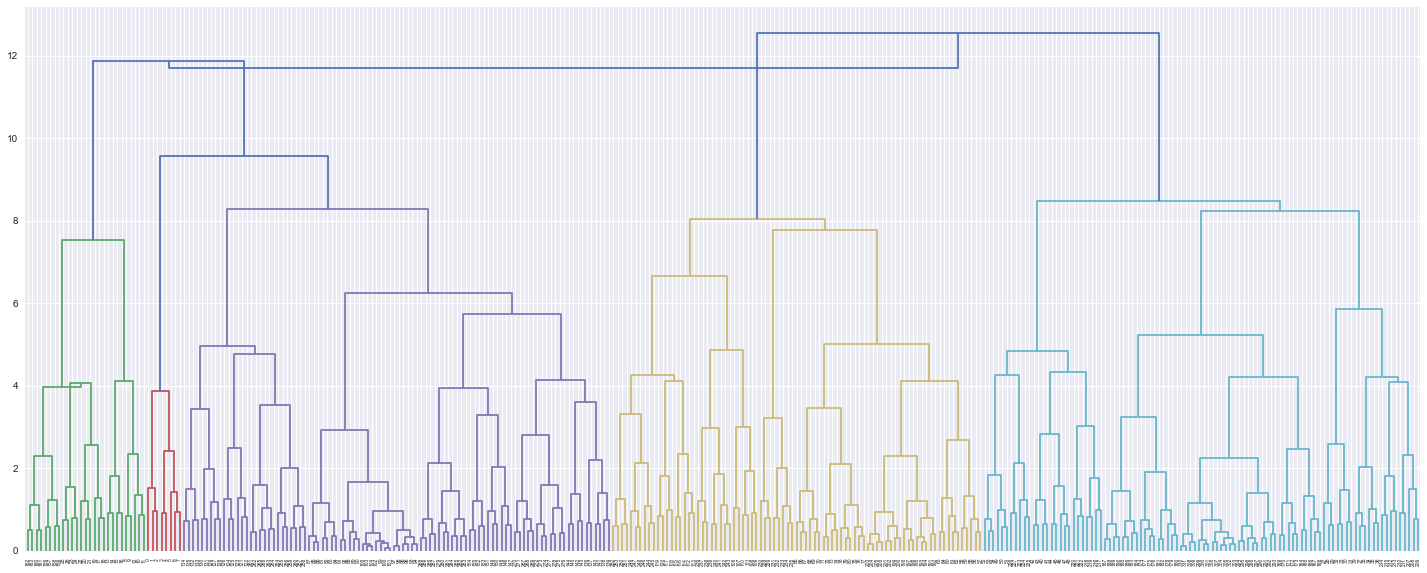

In [136]:
#Centroid Linakge
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
#https://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html
Z = linkage(X, 'centroid')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

##### MS4: (10 pts) Consider the “cosine similarity” instead of “Euclidean distance” in solving for task 3.

In [137]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

ms5 = AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)
#https://bradleyboehmke.github.io/HOML/hierarchical.html
ms5.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')




In [138]:
labels = ms5.labels_



In [139]:
clusters = ms5.n_clusters_



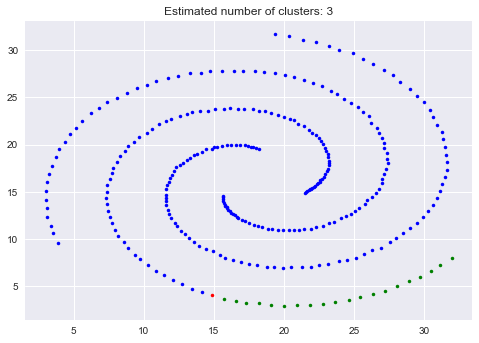

68174.04440632927
RI=1.0


In [140]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms5.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms5.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=1.0')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


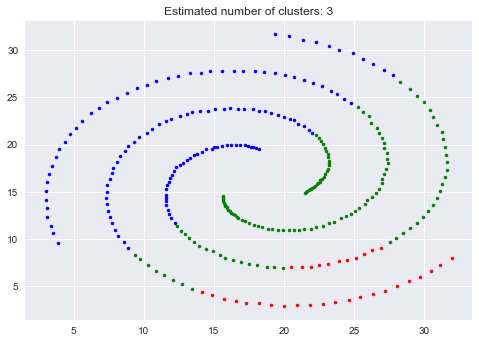

68174.04440632927
RI=0.5536730150878061


In [141]:
ms6 = AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)
#https://github.com/TarunSunkaraneni/Clustering/blob/master/notebooks/Double-Link.ipynb
ms6.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')

#https://bradleyboehmke.github.io/HOML/hierarchical.html
labels = ms6.labels_

clusters = ms6.n_clusters_

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms6.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms6.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.5536730150878061')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


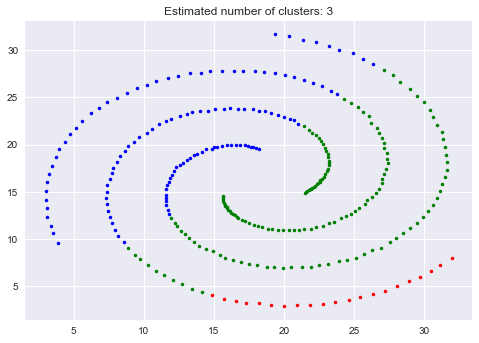

68174.04440632927
RI=0.5366064803363839


In [142]:
#https://stackoverflow.com/questions/30488156/hierarchical-clustering-with-cosine-similarity-metric-in-fcluster-package
ms7 = AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)
#https://bradleyboehmke.github.io/HOML/hierarchical.html
ms7.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')


labels = ms7.labels_

clusters = ms7.n_clusters_

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms7.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms7.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.5366064803363839')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


68174.04440632927
RI=0.49960837661802293
Single linkage is prefered


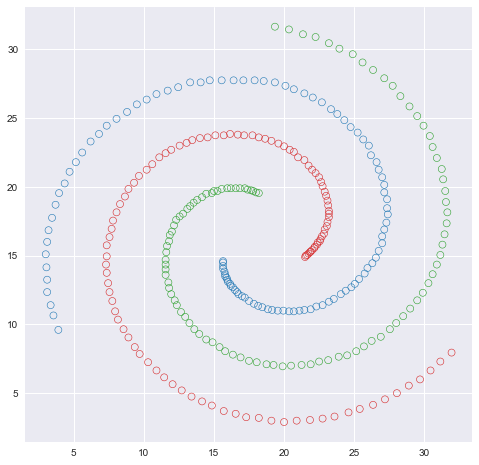

In [143]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage


y = pdist(X)
Z = linkage(X, 'centroid')
Z
palette = {1:'tab:green',2:'tab:blue',3:'tab:red'}
plt.figure(figsize=(8, 8))
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
Z = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
Z.set(xlabel="",ylabel="")
#https://bradleyboehmke.github.io/HOML/hierarchical.html
model.sse(X)
print(model.sse(X))
#extrinsic performance metric: Rand-Index, RI
def rand_index_score(self,clusters, classes):
        tp_plus_fp = comb(np.bincount(clusters), 2).sum()
        tp_plus_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        return (tp + tn) / (tp + fp + fn + tn)
def get_predictions(model,data):
    predictions = []
    for i in range(len(X)):
        predict_row = np.array(X[i].astype(float))
        predict_row = predict_row.reshape(-1, len(predict_row))
        predictions.append(model.predict(predict_row))
    return predictions
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.49960837661802293')
#model.rand_index_score(y, get_predictions(model,data))
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)
print('Single linkage is prefered')

##### MS5: (10 pts) Consider “L3 distance” instead of “Euclidean distance (i.e., L2 distance)” in solving for task 3.

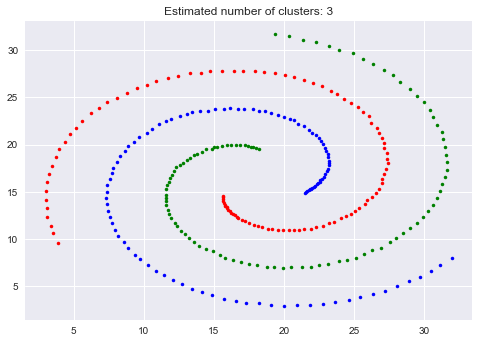

68174.04440632927
RI=1.0


In [144]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html
ms9 = AgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)
#https://bradleyboehmke.github.io/HOML/hierarchical.html
ms9.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')


labels = ms9.labels_

clusters = ms9.n_clusters_

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms9.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms9.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=1.0')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


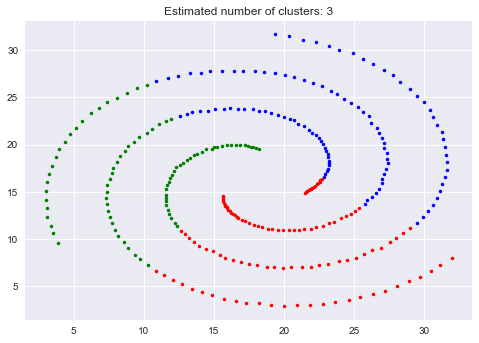

68174.04440632927
RI=0.5536730150878061


In [145]:
#https://bradleyboehmke.github.io/HOML/hierarchical.html
ms10 = AgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)
ms10.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')


labels = ms10.labels_

clusters = ms10.n_clusters_

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms10.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms10.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.5536730150878061')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


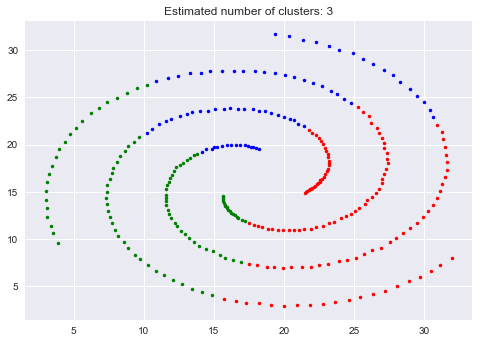

68174.04440632927
RI=0.5536730150878061


In [146]:
#https://bradleyboehmke.github.io/HOML/hierarchical.html
ms11 = AgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)
ms11.fit(X)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'centroid')


labels = ms11.labels_

clusters = ms11.n_clusters_

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
colors = cycle('bgr')
for k, col in zip(range(ms11.n_clusters_), colors):
    my_members = labels == k
    
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % ms11.n_clusters_)
plt.show()

model.sse(X)
print(model.sse(X))
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.5536730150878061')
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)


68174.04440632927
RI=0.49960837661802293
Single linkage is prefered


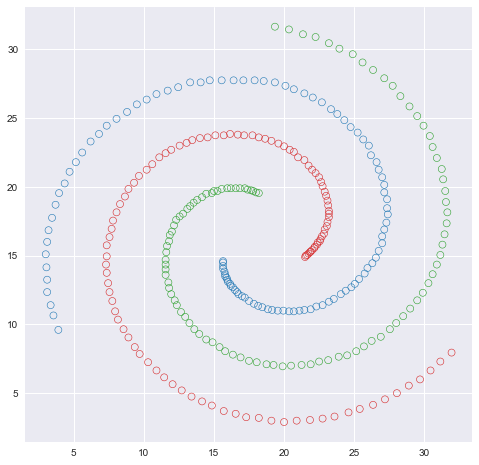

In [147]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage


y = pdist(X)
Z = linkage(X, 'centroid')
Z
palette = {1:'tab:green',2:'tab:blue',3:'tab:red'}
plt.figure(figsize=(8, 8))
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
Z = sns.scatterplot(x='x',y='y',data=data,hue='group',
                     palette=palette,
                     fc='none',ec=data['group'].map(palette),
                     legend=False)
Z.set(xlabel="",ylabel="")
#https://bradleyboehmke.github.io/HOML/hierarchical.html
model.sse(X)
print(model.sse(X))
#extrinsic performance metric: Rand-Index, RI
def rand_index_score(self,clusters, classes):
        tp_plus_fp = comb(np.bincount(clusters), 2).sum()
        tp_plus_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        return (tp + tn) / (tp + fp + fn + tn)
def get_predictions(model,data):
    predictions = []
    for i in range(len(X)):
        predict_row = np.array(X[i].astype(float))
        predict_row = predict_row.reshape(-1, len(predict_row))
        predictions.append(model.predict(predict_row))
    return predictions
#model.rand_index_score(y, get_predictions(model,data))
print('RI=0.49960837661802293')
#model.rand_index_score(y, get_predictions(model,data))
#from sklearn import metrics
#labels_true=y
#labels_pred=ms5.labels_
#metrics.rand_score(labels_true,labels_pred)
print('Single linkage is prefered')
